## Task1. AUC Plot

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# histogram of result
df_val = pd.DataFrame(data={'nontoxic':[0.727, 0.813, 0.846],
                           'verytoxic':[0.663, 0.743, 0.793],
                           'ghs':[0.741, 0.729, 0.785],
                           'epa':[0.722, 0.79, 0.8],
                           'logld50':[1.643, 1.592, 1.478]},
                     index=['CNN', 'RNN', 'MLP'])
df_test = pd.DataFrame(data={'nontoxic':[0.724, 0.792, 0.838],
                           'verytoxic':[0.788, 0.796, 0.859],
                           'ghs':[0.751, 0.726, 0.814],
                           'epa':[0.774, 0.8, 0.842],
                           'logld50':[1.639, 1.635, 1.509]},
                     index=['CNN', 'RNN', 'MLP'])

In [3]:
df_val.head()

epa    ghs  logld50  nontoxic  verytoxic
CNN  0.722  0.741    1.643     0.727      0.663
RNN  0.790  0.729    1.592     0.813      0.743
MLP  0.800  0.785    1.478     0.846      0.793

In [4]:
index = np.arange(5)
fig, ax = plt.subplots(dpi=2400)
bar_width = 0.15
opacity = 0.8

rects_cnn = plt.bar(index, df_val.iloc[0,:], bar_width,
                 alpha=opacity,
                 color='C2',
                 label='CNN')
rects_rnn = plt.bar(index+bar_width, df_val.iloc[1,:], bar_width,
                 alpha=opacity,
                 color='C1',
                 label='RNN')
rects_rnn = plt.bar(index+2*bar_width, df_val.iloc[2,:], bar_width,
                 alpha=opacity,
                 color='C0',
                 label='MLP')

plt.ylabel('AUC (<=1.0) or RMSE (>=1.0)')
plt.title('Accuracy comparison of three models')
plt.xticks(index + bar_width, ('EPA', 'GHS', 'LD50', 'Nontoxic', 'Verytoxic'))
plt.legend()
 
plt.tight_layout()
plt.savefig('result_comparison.png', format='png', dpi=2400)

## Task 2. Prediction Plot

In [114]:
homedir = os.path.dirname(os.path.realpath('__file__'))
df_epa = pd.read_csv(r'{}'.format(homedir+'/../result/tox_niehs_int_epa_final.csv'))
df_ghs = pd.read_csv(r'{}'.format(homedir+'/../result/tox_niehs_int_ghs_final.csv'))
df_nontoxic = pd.read_csv(r'{}'.format(homedir+'/../result/tox_niehs_int_nontoxic_final.csv'))
df_verytoxic = pd.read_csv(r'{}'.format(homedir+'/../result/tox_niehs_int_verytoxic_final.csv'))
df_ld50 = pd.read_csv(r'{}'.format(homedir+'/../result/tox_niehs_int_logld50_final.csv'))

In [115]:
df_ld50.head()

id                            smiles   logld50       0_x       0_y  \
0    molid70                          ClC=CCCl  4.552809  5.713997  5.158228   
1   molid597                    O=C(O)CCC(=O)O  7.060025  8.307622  7.251510   
2  molid1673                      CC1CCCCN1N=O  6.396930  6.526076  5.689474   
3  molid1818  NC(Cc1ccc(N(CCCl)CCCl)cc1)C(=O)O  3.673706  5.953615  5.681669   
4  molid1841                     CCN(CC)C(=S)S  7.178065  6.198450  5.890887   

         0  
0  5.38323  
1  7.20584  
2  6.99694  
3  6.44761  
4  5.60110

In [116]:
# sort dataframe based on id
# Add of a column containing a numbered version of the index
df_epa = df_epa.dropna()
df_ghs = df_ghs.dropna()
df_nontoxic = df_nontoxic.dropna()
df_verytoxic = df_verytoxic.dropna()
df_ld50 = df_ld50.dropna()
print(df_ld50.isnull().values.any())

False


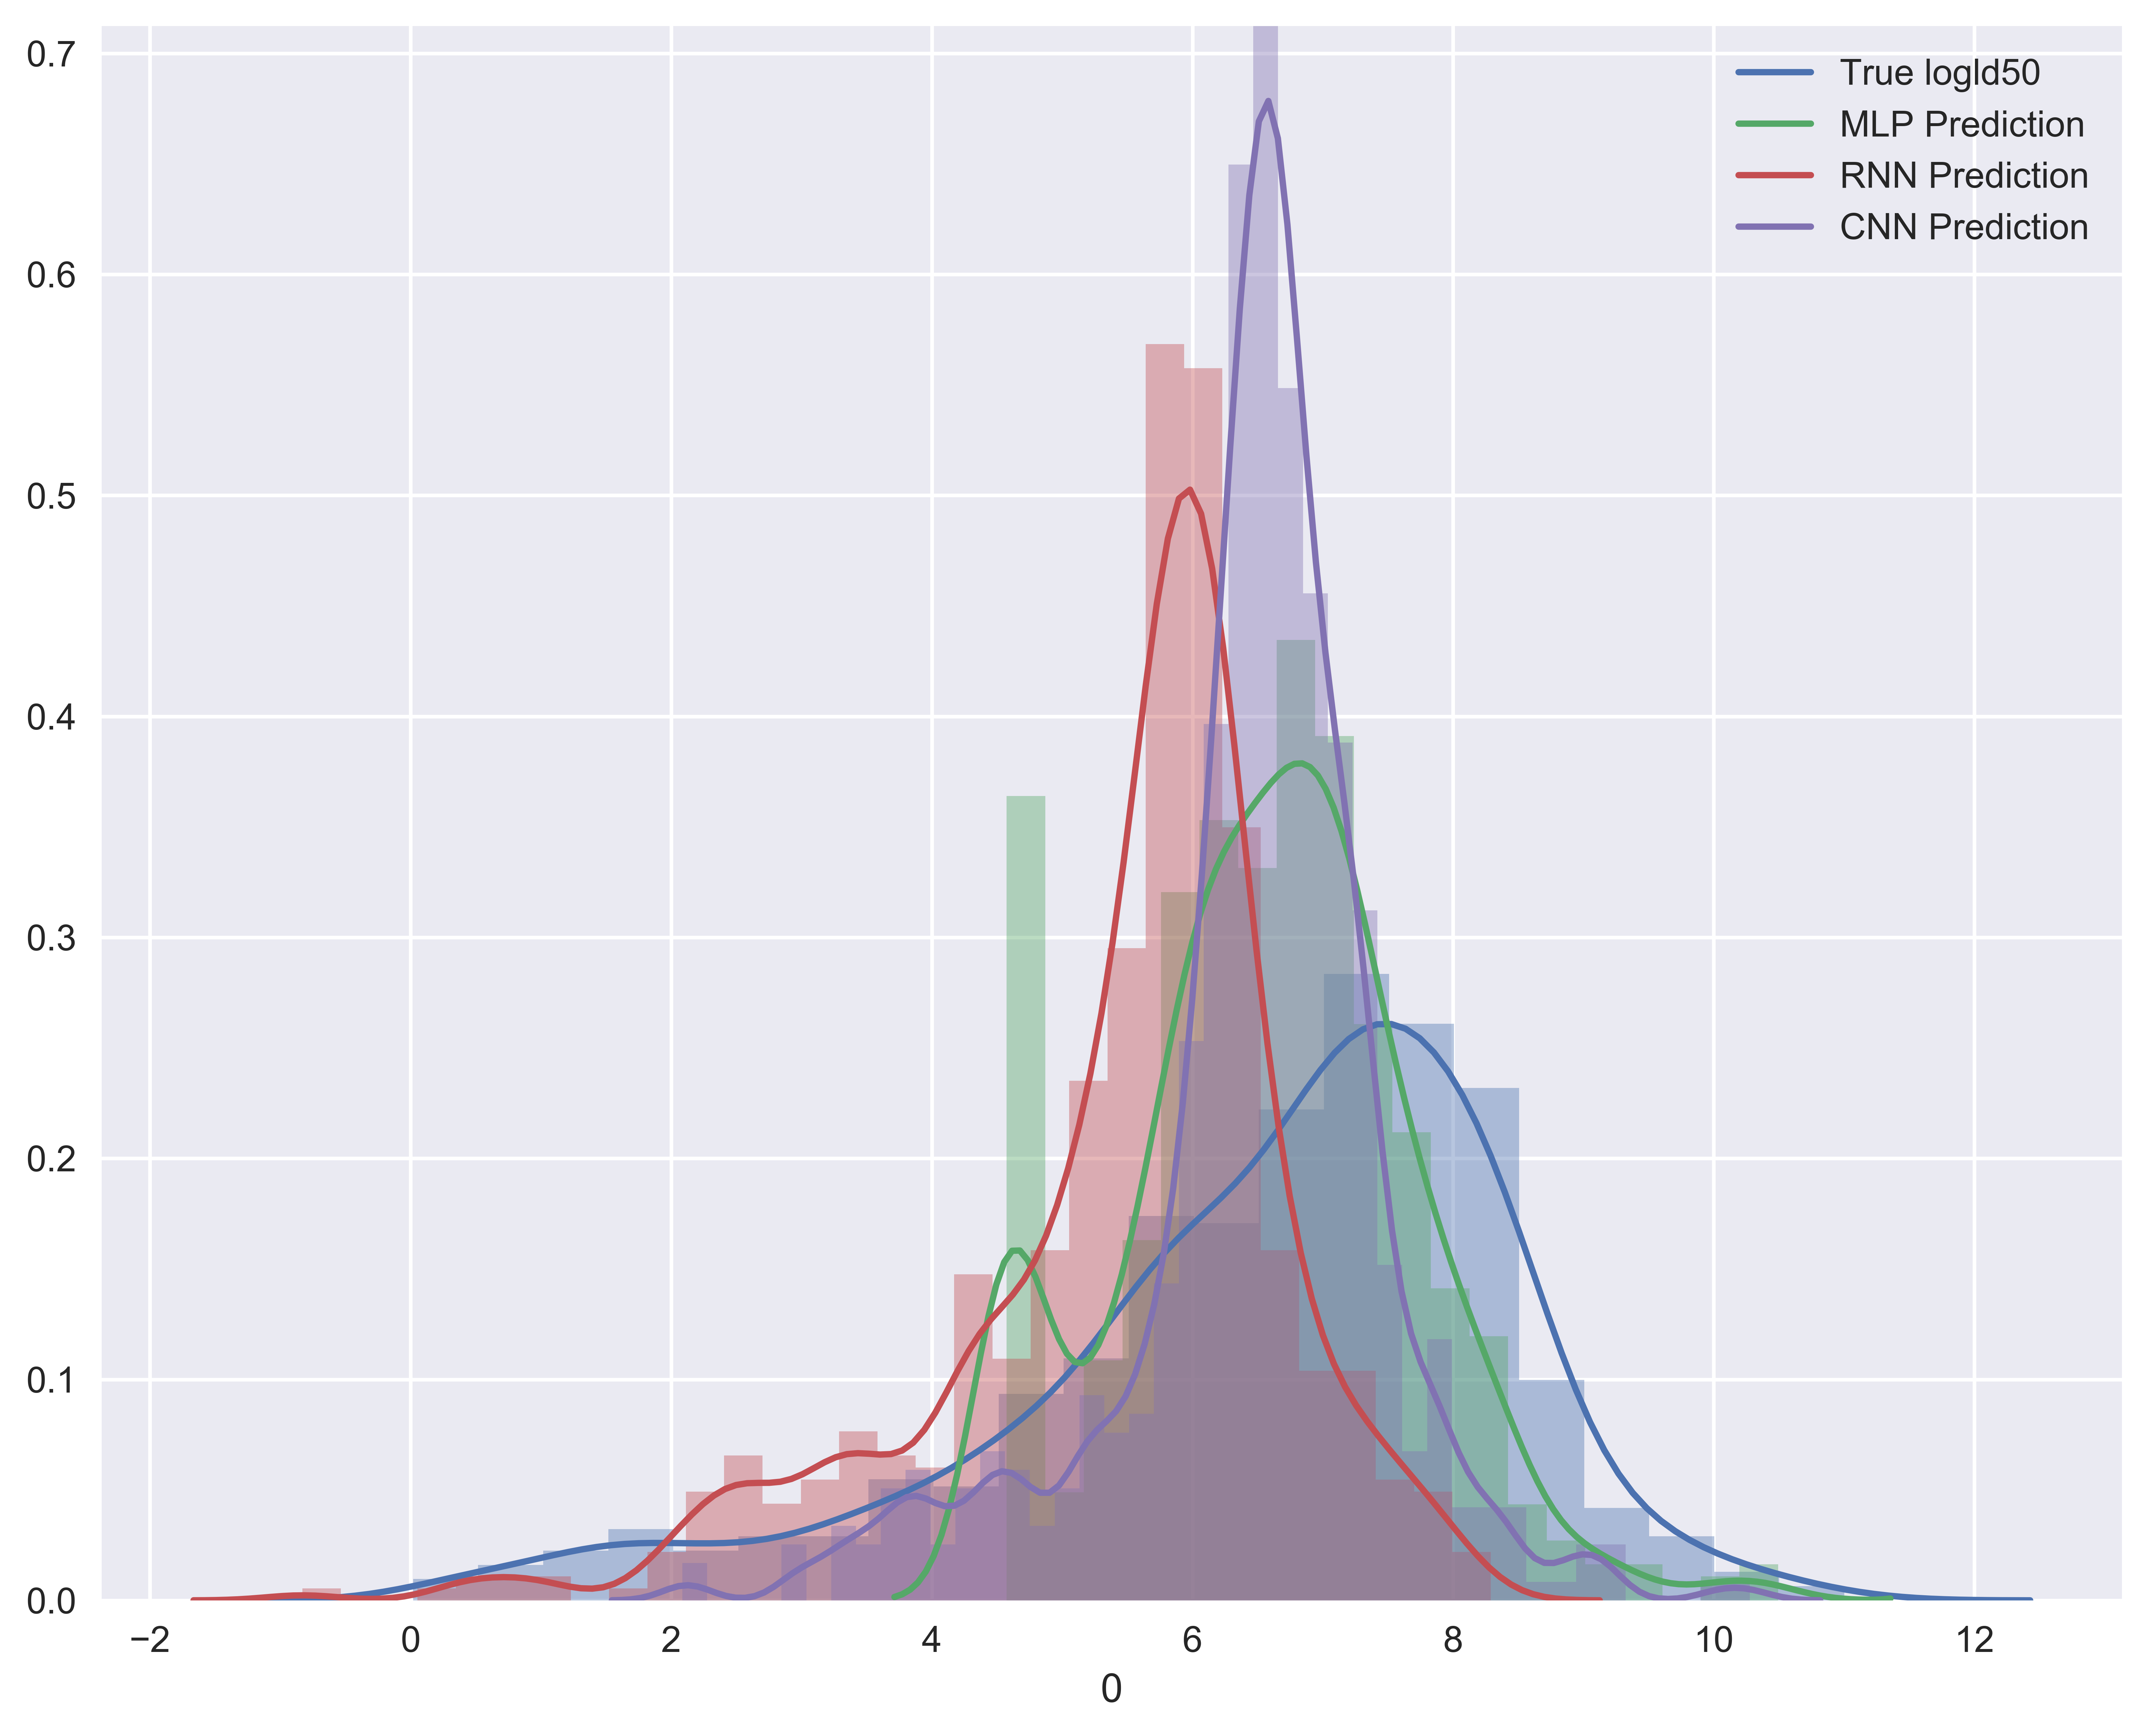

In [49]:
##################### Regression Presentation ##############################
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,8), dpi=800)
sns.distplot(df_ld50.logld50, kde_kws={"label": "True logld50"})
sns.distplot(df_ld50['0_x'], kde_kws={"label": "MLP Prediction"})
sns.distplot(df_ld50['0_y'], kde_kws={"label": "RNN Prediction"})
sns.distplot(df_ld50['0'], kde_kws={"label": "CNN Prediction"})
plt.legend()
plt.show()

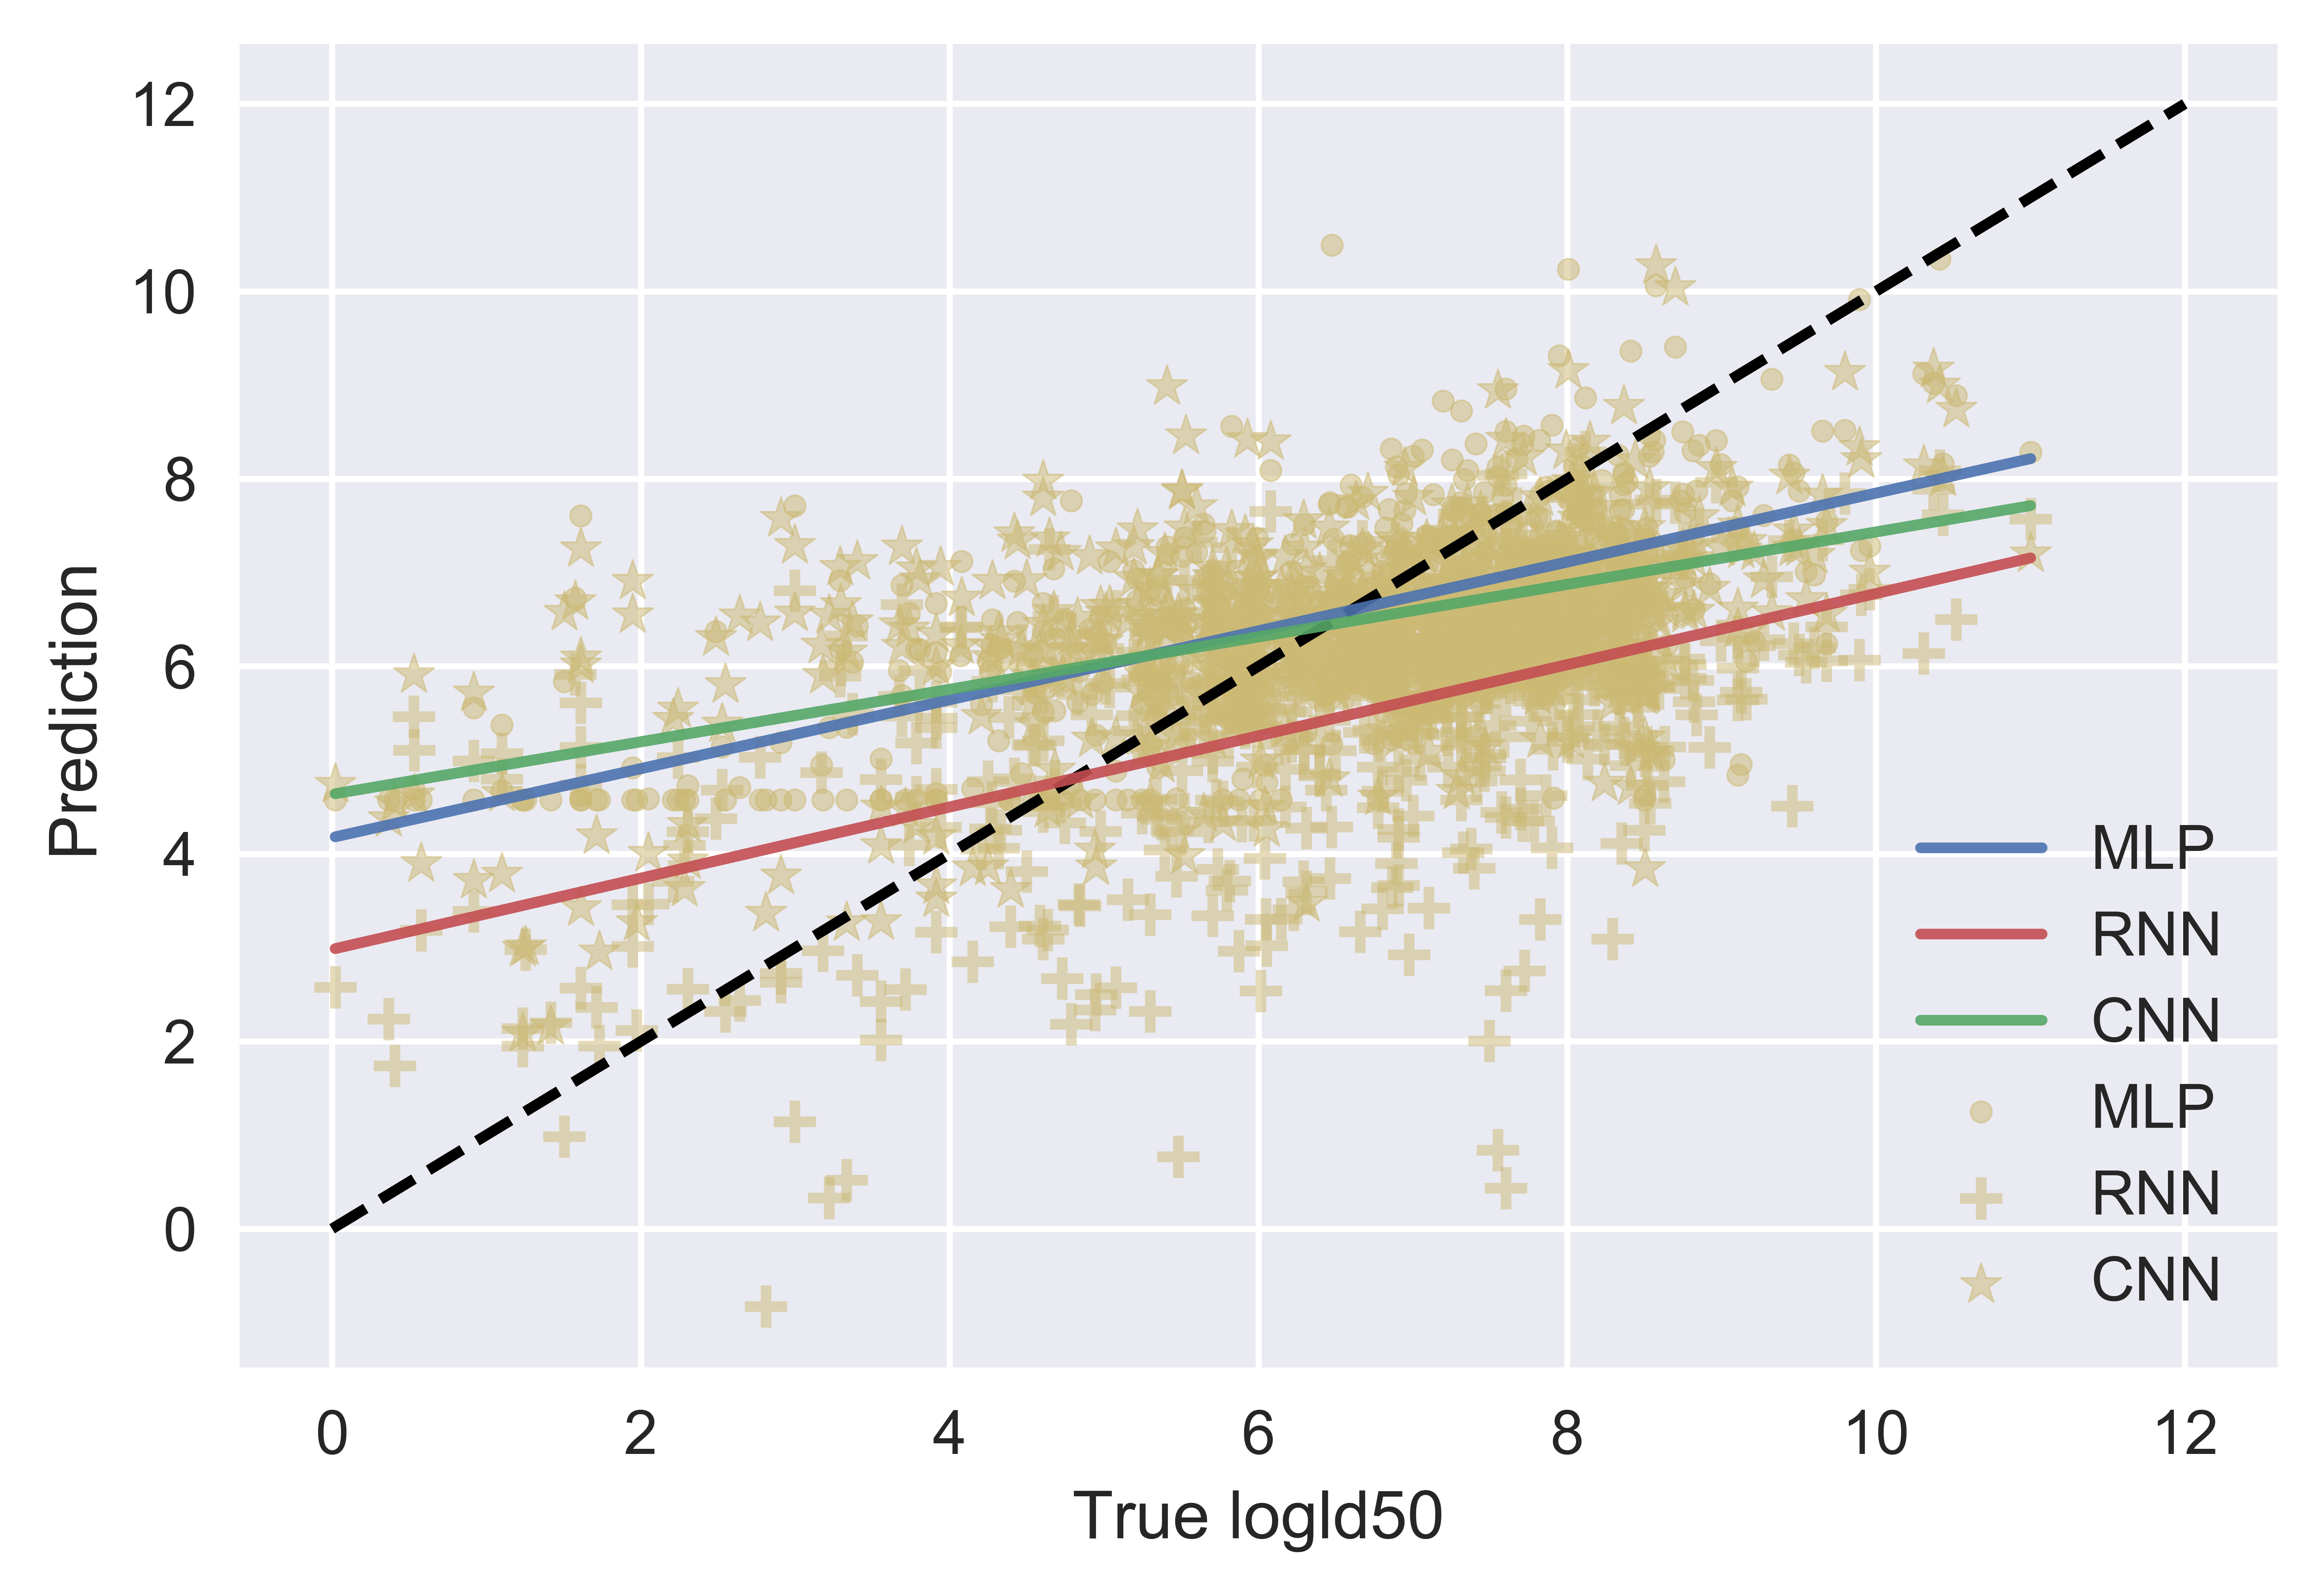

In [117]:
from numpy.polynomial.polynomial import polyfit

fig, ax = plt.subplots(dpi=1200)
x = df_ld50.logld50
y_mlp = df_ld50['0_x']
y_rnn = df_ld50['0_y']
y_cnn = df_ld50['0']
plt.scatter(x, y_mlp, alpha=0.5, marker='.', color='C4', label="MLP")
plt.scatter(x, y_rnn, alpha=0.5, marker='+', color='C4', label="RNN")
plt.scatter(x, y_cnn, alpha=0.5, marker='*', color='C4', label="CNN")
b_mlp, m_mlp = polyfit(x, y_mlp, 1)
b_rnn, m_rnn = polyfit(x, y_rnn, 1)
b_cnn, m_cnn = polyfit(x, y_cnn, 1)
ax.plot([0, 12], [0, 12], '--', color='black')
ax.plot(x, m_mlp*x+b_mlp, '-', label="MLP", color='C0', alpha=0.9)
ax.plot(x, m_rnn*x+b_rnn, '-', label="RNN", color='C2', alpha=0.9)
ax.plot(x, m_cnn*x+b_cnn, '-', label="CNN", color='C1', alpha=0.9)
ax.set_xlabel('True logld50')
ax.set_ylabel('Prediction')
plt.legend()
plt.savefig('log50_comparison.png', format='png', dpi=2400)

In [17]:
#df_epa['indexNumber'] = [int(i.split('d')[-1]) for i in df_epa.id]
# Perform sort of the rows
#df_epa.sort_values(['indexNumber'], ascending = [True], inplace = True)
# Deletion of the added column
#df_epa.drop('indexNumber', 1, inplace = True)

In [18]:
##################### Classification Presentation ##############################

from sklearn.metrics import confusion_matrix
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot non-normalized confusion matrix
task_df = [df_epa, df_ghs, df_nontoxic, df_verytoxic, df_ld50]
taskname = ['epa', 'ghs', 'nontoxic', 'verytoxic']
class_num = [4, 5, 2, 2]

fig, ax = plt.subplots(4,3, figsize=(8, 8), dpi=1200)

for i in np.arange(len(taskname)):
    cmp_list = ['mlp prediction', 'cnn prediction', 'rnn prediction']
    df = task_df[i]
    df['cnn prediction'] = df['cnn prediction'].astype(int)
    classes = ['' + str(k) for k in np.arange(class_num[i])]
    for j in np.arange(3):
        cm = confusion_matrix(df[taskname[i]], df[cmp_list[j]])
        h = ax[i, j].matshow(cm, cmap='RdBu')
        ax[i, j].set_xticklabels([''] + classes)
        ax[i, j].set_yticklabels([''] + classes)
        ax[i, j].set_xlabel(cmp_list[j])
        ax[i, j].set_ylabel('True '+ taskname[i])
        divider = make_axes_locatable(ax[i, j])
        cax1 = divider.append_axes("right", size="5%", pad=0.08)
        cbar = plt.colorbar(h, cax = cax1)
        
plt.tight_layout()
plt.savefig('confusion_matrix.png', format='png', dpi=1200)